Dataset Loaded Successfully!
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Sample Transaction: ['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack']

Frequent Itemsets:
    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.005644       (abrasive cleaner)
3  0.007440       (artif. sweetener)
4  0.031042          (baking powder)

Top Rules:
               antecedents              consequents   support  confidence  \
0             (rolls/buns)  (Instant food products)  0.005387    0.015407   
1  (Instant food products)             (rolls/buns)  0.005387    0.

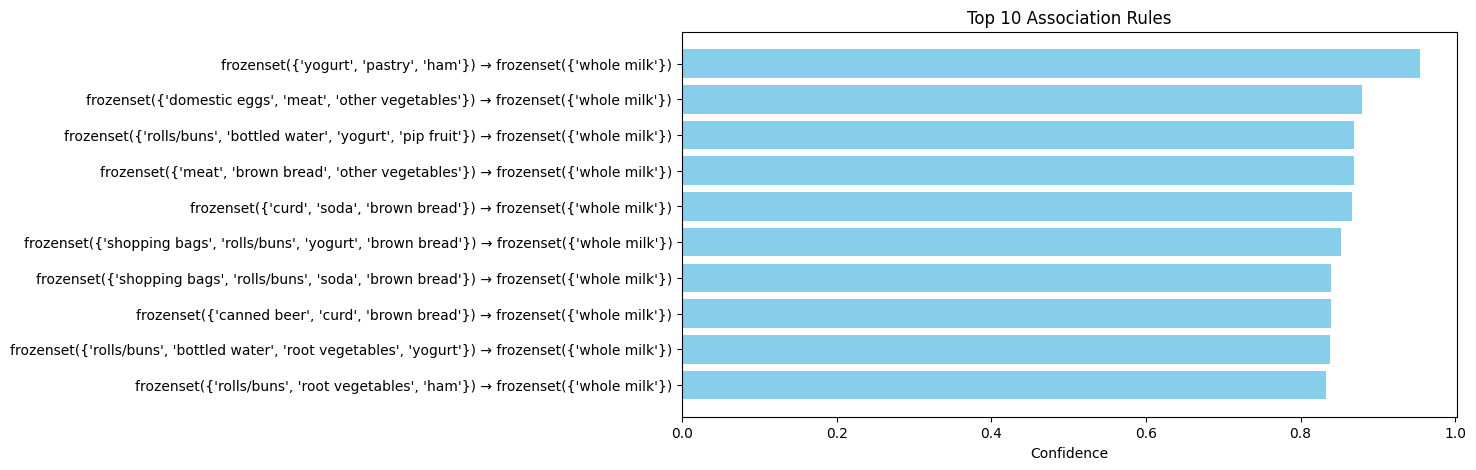

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# ---------------------------------------
# STEP 1: Load Data
# ---------------------------------------
df = pd.read_csv("Order1.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# ---------------------------------------
# STEP 2: Data Pre-processing
# Group items per customer (one basket per Member_number)
# ---------------------------------------
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list).tolist()

print("\nSample Transaction:", transactions[0])

# ---------------------------------------
# STEP 3: One-Hot Encoding
# ---------------------------------------
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# ---------------------------------------
# STEP 4: Apply Apriori Algorithm
# ---------------------------------------
frequent_items = apriori(basket, min_support=0.005, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_items.head())

# ---------------------------------------
# STEP 5: Generate Association Rules
# ---------------------------------------
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
print("\nTop Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

# ---------------------------------------
# STEP 6: Visualization (Simple)
# Plot top 10 rules by confidence
# ---------------------------------------
top10 = rules.sort_values(by='confidence', ascending=False).head(10)
top10['rule'] = top10['antecedents'].astype(str) + " → " + top10['consequents'].astype(str)

plt.figure(figsize=(10,5))
plt.barh(top10['rule'], top10['confidence'], color='skyblue')
plt.xlabel("Confidence")
plt.title("Top 10 Association Rules")
plt.gca().invert_yaxis()
plt.show()
